## Recognising Handwritten Digits on MNIST Dataset Using KNN

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("mnist_train.csv")
print(df.shape)
df.head()

(60000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
data=df.values
print(data.shape)
print(type(data))

(60000, 785)
<class 'numpy.ndarray'>


In [4]:
X=data[:,1:]
Y=data[:,0]

In [5]:
#Defining training and testing data
split=int(0.8*X.shape[0])
print(split)
X_train=X[:split,:]
X_test=Y[:split]

Y_train=X[split:,:]
Y_test=Y[split:]

print(X_train.shape,Y_train.shape)
print(Y_train.shape,Y_test.shape)

48000
(48000, 784) (12000, 784)
(12000, 784) (12000,)


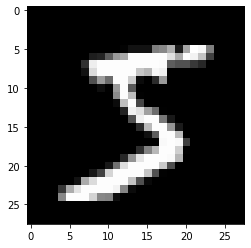

5


In [6]:
def drawImg(sample):
  img=sample.reshape((28,28))
  plt.imshow(img,cmap='gray')
  plt.show()

drawImg(X_train[0])
print(X_test[0])

In [7]:
#Euclidean distance
def dist(x1,x2):
  return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
  vals=[]
  m=X.shape[0]

  for i in range(m):
    d=dist(queryPoint,X[i])
    vals.append((d,Y[i]))

  vals=sorted(vals)
  vals=np.array(vals[0:k])
  #vals=np.array(vals)
  new_vals=np.unique(vals[:,1],return_counts=True)
  #print(new_vals)
  index=new_vals[1].argmax()
  pred=new_vals[0][index]
  return pred



Enter pixel no : 5
Predicted Value : 6
Original Image


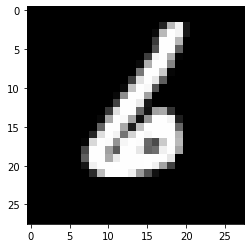

6


In [8]:
i=int(input("Enter pixel no : "))
pred=knn(X_train,X_test,Y_train[i])
print("Predicted Value : "+str(int(pred)))
print("Original Image")
drawImg(Y_train[i])
print(Y_test[i])